In [18]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import yaml
import cartopy.crs as ccrs

home       = os.path.expanduser("~")
yaml_path  = os.path.join(home, 'dirpaths.yaml')
data_dir   = yaml.safe_load(open(yaml_path))['CPOM2_PATH']
fpath      = os.path.join(data_dir, 'jules', 'output', 'jules_vn7.9', 'era5_gridded_meltlake', 'era5_init_minus10_gridded.vars.nc')

In [42]:
ds   = nc.Dataset(fpath, 'r') 
#tstar = ds.variables['tstar'][12,8,:,:].squeeze()   # time, tile, x, y         
lats = ds.variables['latitude'][:]      
lons = ds.variables['longitude'][:]    
#ds.close()

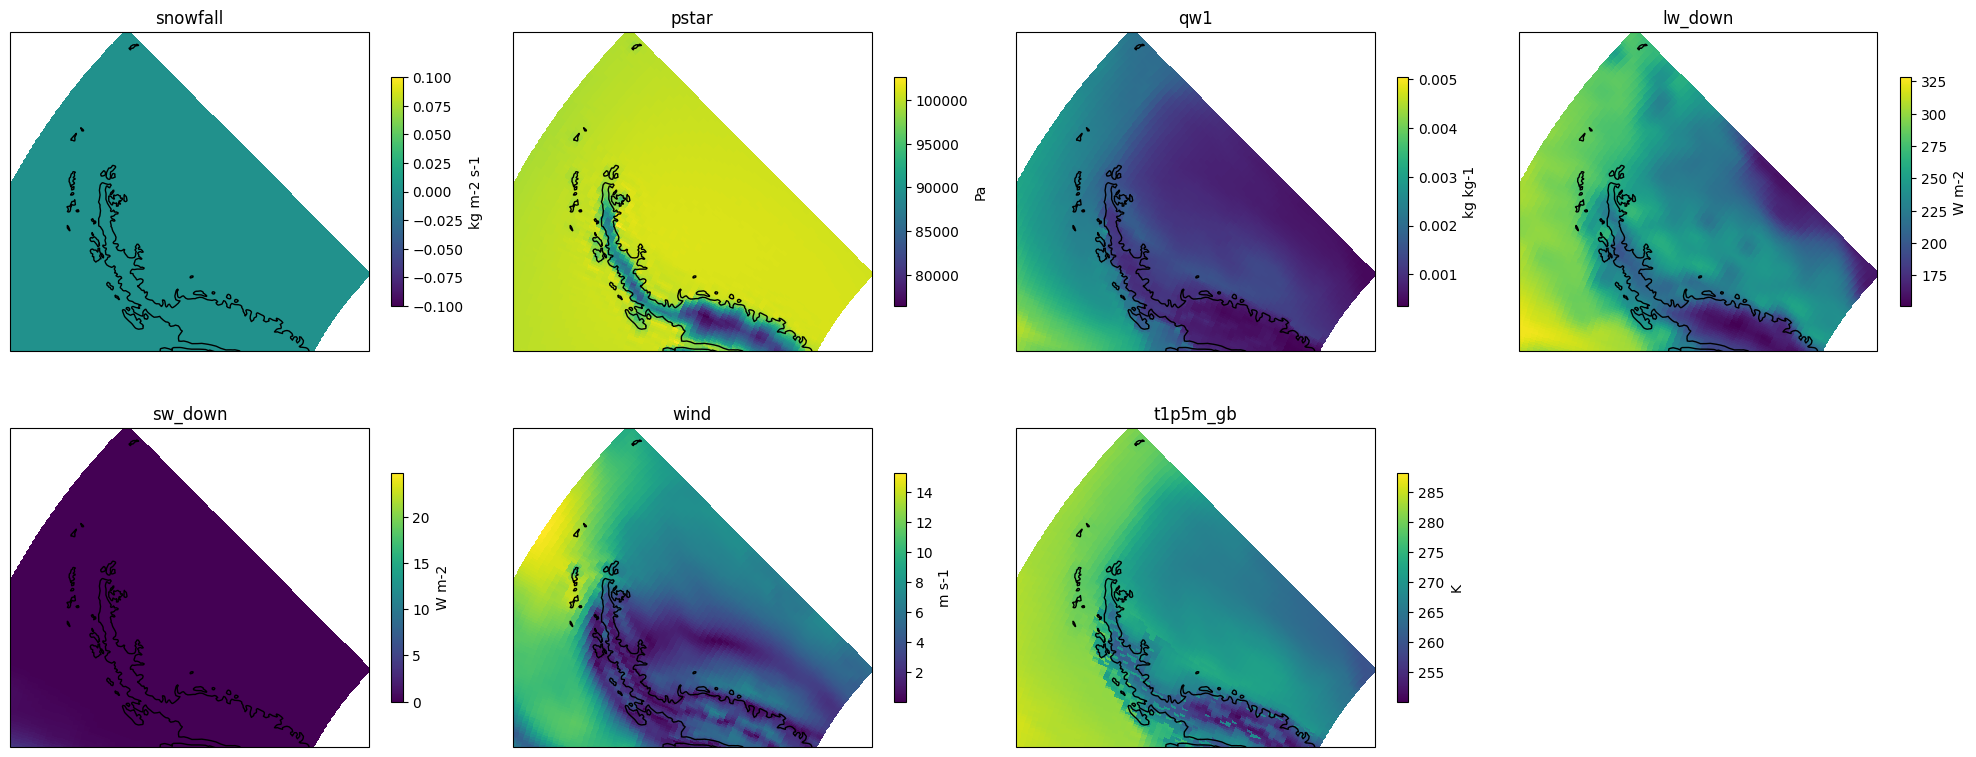

In [51]:
gb_vars = ['snowfall', 'pstar', 'qw1', 'lw_down', 'sw_down', 'wind', 't1p5m_gb']

fig, axes = plt.subplots(-(-len(tile_vars) // 4), 4, figsize=(20, 4 * ((len(tile_vars) + 3) // 4)),subplot_kw={'projection': ccrs.SouthPolarStereo()} )

axes = axes.ravel()

for i, v in enumerate(gb_vars):
    ax = axes[i]
    data = ds[v][-1, :, :].squeeze()
    units = getattr(ds[v], 'units', '')
    ax.set_extent([298, 315, -75, -60], ccrs.PlateCarree())
    pcm = ax.pcolormesh(lons, lats, data, transform=ccrs.PlateCarree())

    ax.coastlines()
    ax.set_title(v)
    cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
    cbar.set_label(units)
    
for ax in axes[len(gb_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()

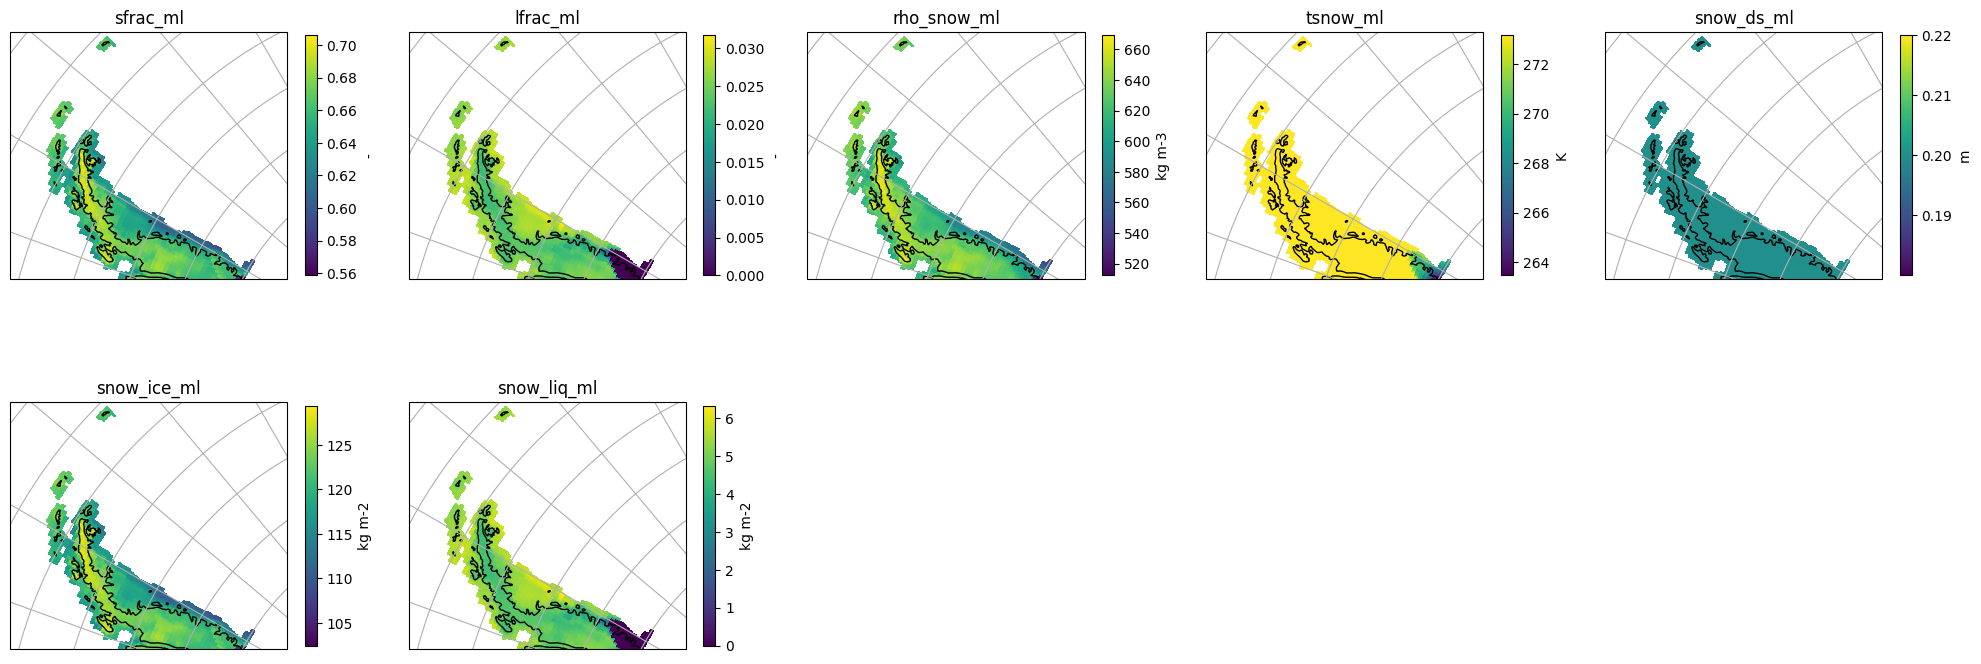

In [49]:
snow_vars = [v for v in ds.variables
             if ds.variables[v].dimensions == ('time', 'snow_ml', 'tile', 'y', 'x')]
#snow_vars = ['sfrac_ml', 'lfrac_ml','rho_snow_ml','tsnow_ml']

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(20, 4 * nrows),
    subplot_kw={'projection': ccrs.SouthPolarStereo()}
)

axes = axes.ravel()

for i, v in enumerate(snow_vars):
    ax = axes[i]
    data = ds[v][-1, 0, 8, :, :].squeeze() # time, snow lev, tile, x, y 
    units = getattr(ds[v], 'units', '')
    ax.set_extent([298, 315, -75, -60], ccrs.PlateCarree())
    pcm = ax.pcolormesh(lons, lats, data, transform=ccrs.PlateCarree())

    ax.coastlines()
   
    ax.gridlines()
    ax.set_title(v)
    cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
    cbar.set_label(units)
    
for ax in axes[len(snow_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()

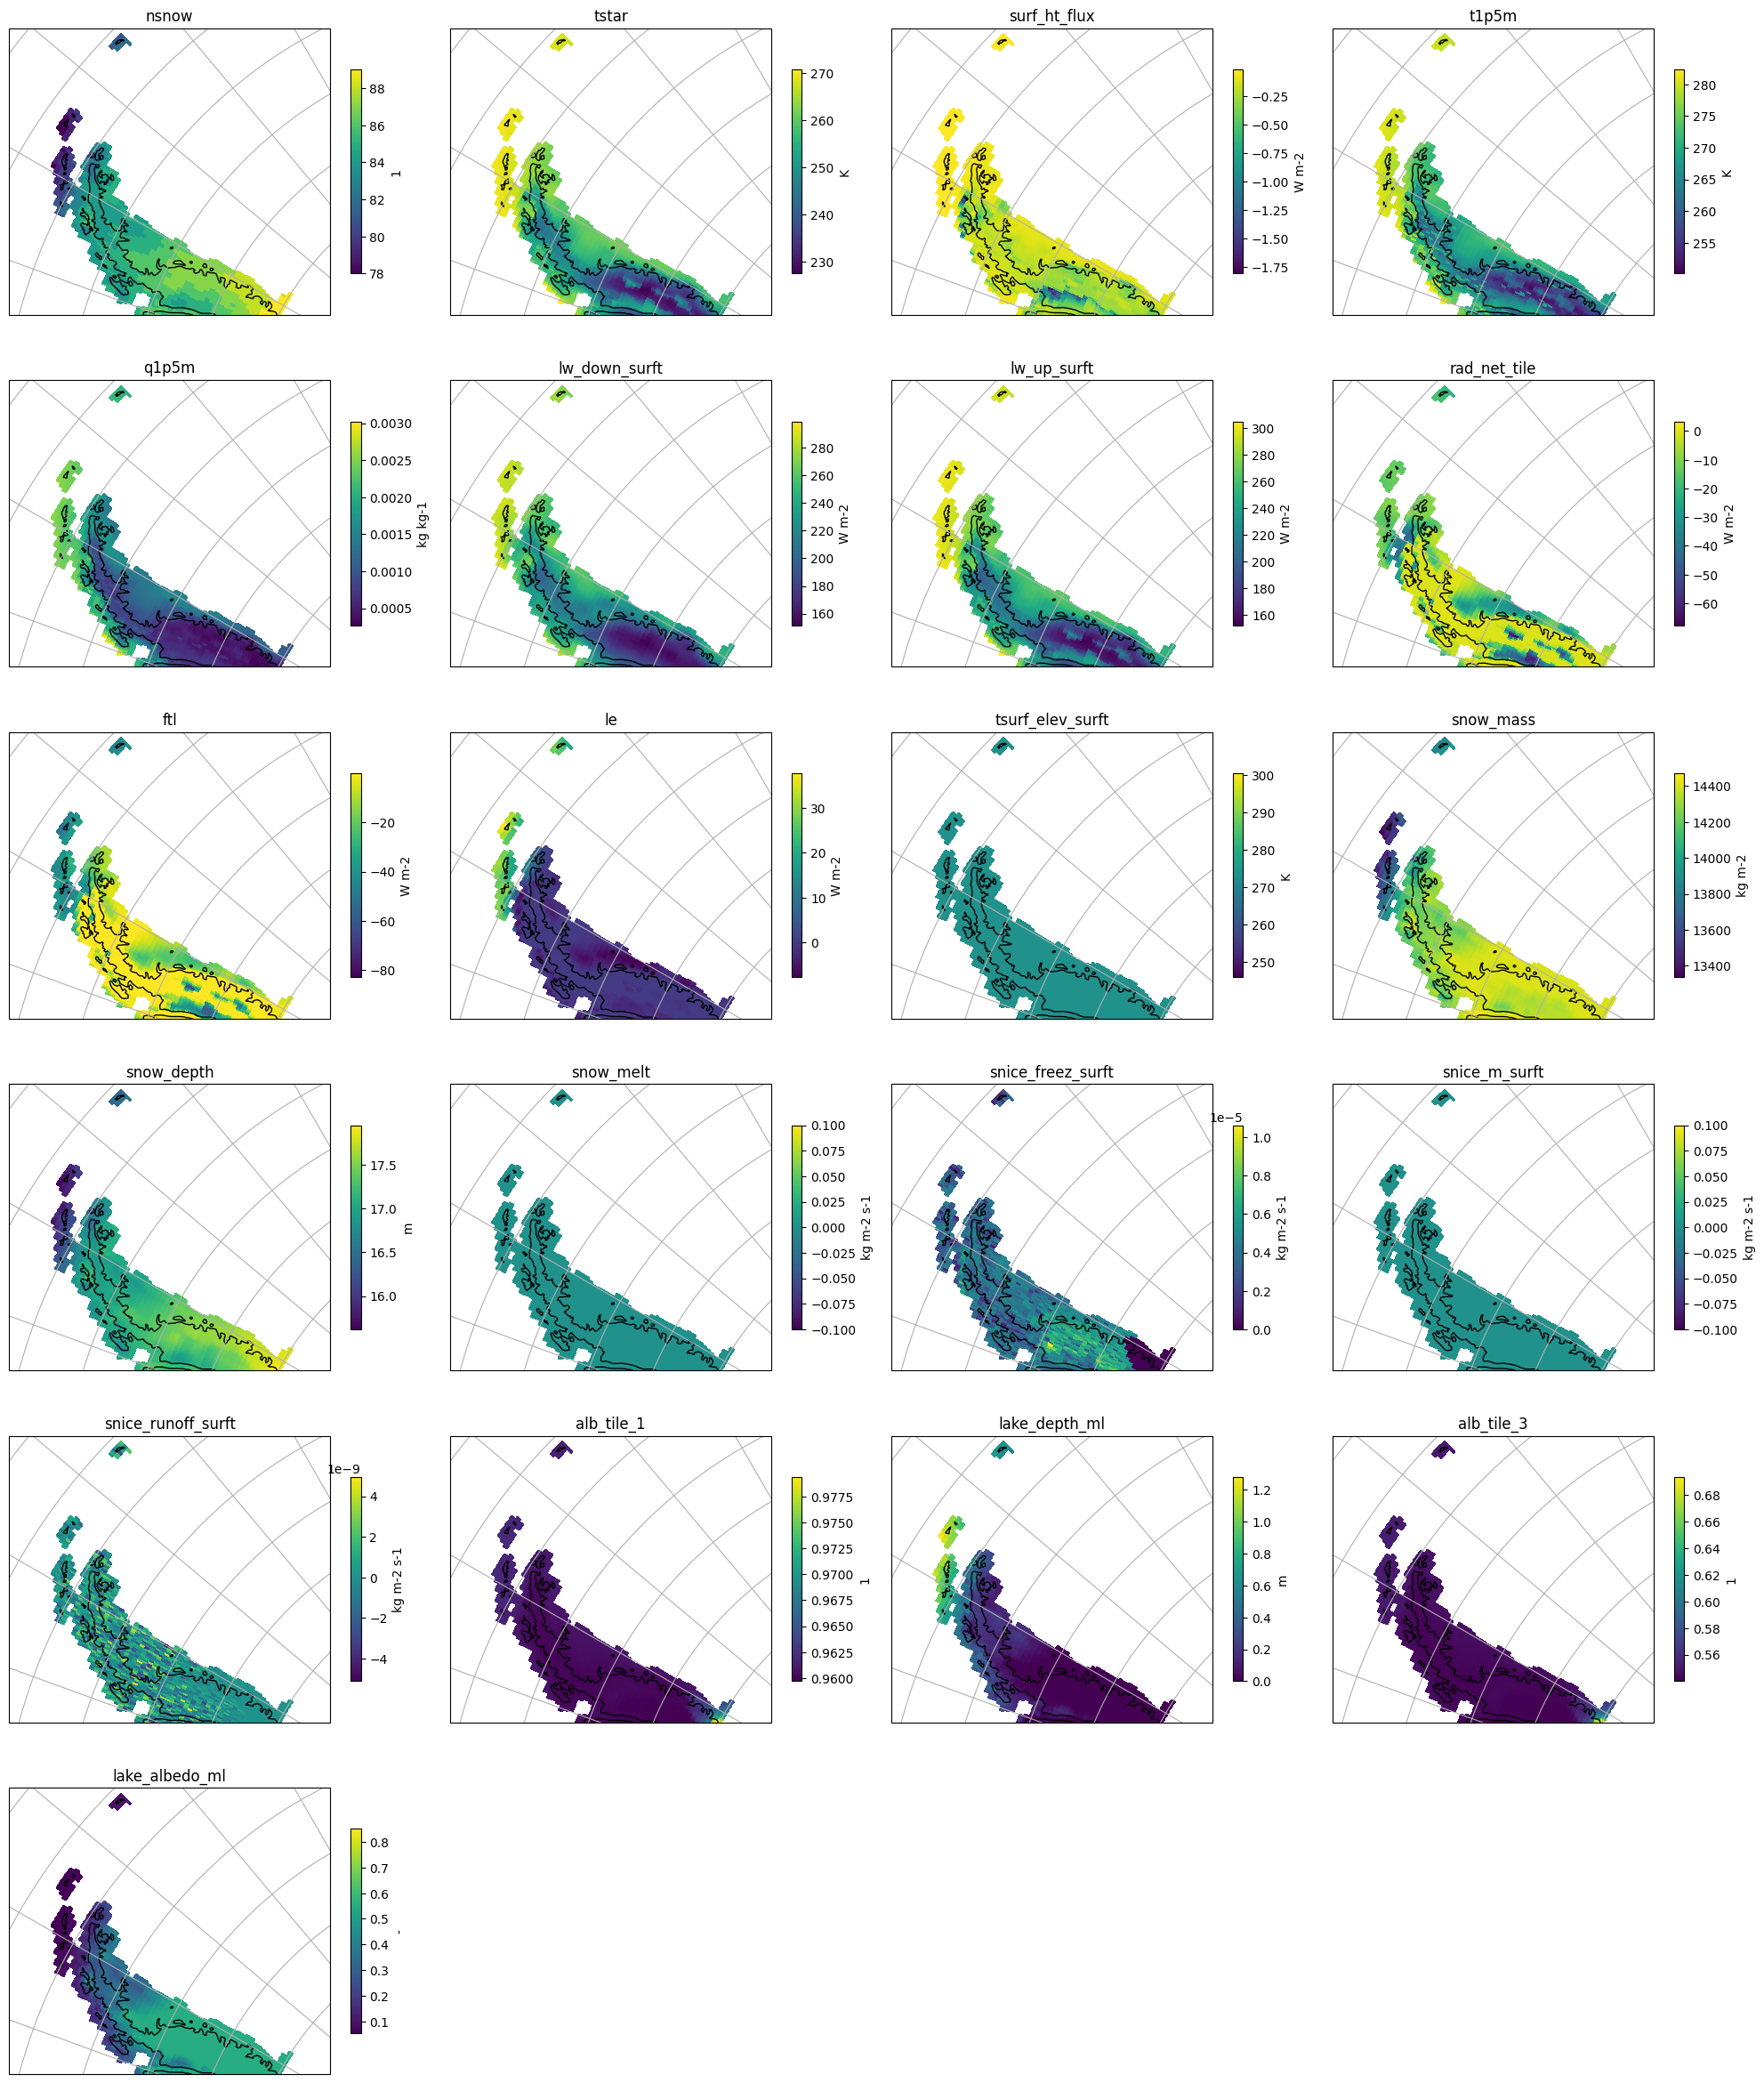

In [48]:
tile_vars = [v for v in ds.variables if ds.variables[v].dimensions == ('time', 'tile', 'y', 'x')]

ncols = 5
nrows = (len(gb_vars) + ncols - 1) // ncols  #

fig, axes = plt.subplots(-(-len(tile_vars) // 4), 4, figsize=(20, 4 * ((len(tile_vars) + 3) // 4)),subplot_kw={'projection': ccrs.SouthPolarStereo()} )

axes = axes.ravel()

for i, v in enumerate(tile_vars):
    ax = axes[i]
    data = ds[v][-1, 8, :, :].squeeze() # time, tile, x, y 
    units = getattr(ds[v], 'units', '')
    ax.set_extent([298, 315, -75, -60], ccrs.PlateCarree())
    pcm = ax.pcolormesh(lons, lats, data, transform=ccrs.PlateCarree())

    ax.coastlines()
    ax.set_title(v)
    
    ax.gridlines()
    cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
    cbar.set_label(units)
    

for ax in axes[len(tile_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [33]:
print(tile_vars)


['nsnow', 'tstar', 'surf_ht_flux', 't1p5m', 'q1p5m', 'lw_down_surft', 'lw_up_surft', 'rad_net_tile', 'ftl', 'le', 'tsurf_elev_surft', 'snow_mass', 'snow_depth', 'snow_melt', 'snice_freez_surft', 'snice_m_surft', 'snice_runoff_surft', 'alb_tile_1', 'lake_depth_ml', 'alb_tile_3', 'lake_albedo_ml']
